## Goal: 
Use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 

### Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the CSV file into a DataFrame:

gapminder=pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv')

In [3]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### # Create arrays for features and target variable

In [4]:
x=gapminder.drop('life',axis=1).values
y=gapminder['life'].values
y
x

array([[34811059.0, 2.73, 0.1, ..., 129.9049, 29.5,
        'Middle East & North Africa'],
       [19842251.0, 6.43, 2.0, ..., 130.1247, 192.0,
        'Sub-Saharan Africa'],
       [40381860.0, 2.24, 0.5, ..., 118.8915, 15.4, 'America'],
       ...,
       [86589342.0, 1.86, 0.4, ..., 121.9367, 26.2,
        'East Asia & Pacific'],
       [13114579.0, 5.88, 13.6, ..., 132.4493, 94.9,
        'Sub-Saharan Africa'],
       [13495462.0, 3.85, 15.1, ..., 131.9745, 98.3,
        'Sub-Saharan Africa']], dtype=object)

In [5]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(x.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 9)


## Exploring the Gapminder data

In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [7]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


### visulaize correlation in features

In [8]:
import seaborn as sns

# calculate correlation of gapminder dataframe
gapminder.corr() # computes the pairwise correlation between columns

sns.heatmap(gapminder.corr(),square=True,cmap='RdYlGn')

## Fit & predict for regression

### # Import LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

### #Create regressor :reg

In [10]:
reg=LinearRegression()

### # fit a linear regression with just one feature: 'fertility'

0.6192442167740035


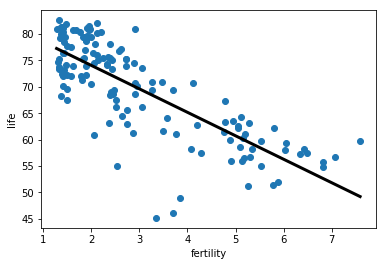

In [11]:
X=gapminder['fertility'].values
Y=gapminder['life'].values

X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,Y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X,Y))
import matplotlib.pyplot as plt

# Plot regression line
plt.scatter(X,Y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('fertility')
plt.ylabel('life')
plt.show()

###  # fit and predict a linear regression over all features

### split data in train and test

In [12]:
from sklearn.model_selection import train_test_split
x=gapminder.drop(['Region','life'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### create regressor

In [13]:
reg=LinearRegression()

### fit regressor with train data

In [14]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predict on the test data: y_pred

In [15]:
y_pred=reg.predict(x_test)

### Compute and print R^2 and RMSE

In [16]:
from sklearn.metrics import mean_squared_error

print("R^2: {}".format(reg.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.838046873143013
Root Mean Squared Error: 3.247601080036951


## CROSS VALIDATION

Cross-validation is a vital step in `evaluating a model`. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In [17]:
from sklearn.model_selection import cross_val_score

### Create a linear regression object: reg

In [18]:
reg=LinearRegression()

###  Compute 5-fold cross-validation scores: cv_scores

In [19]:
cv_scores=cross_val_score(reg,x,y,cv=5)

### Print the 5-fold cross-validation scores

In [20]:
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [21]:
print('average of 5-fold cross-validation scores {}'.format(np.average(cv_scores)))

average of 5-fold cross-validation scores 0.8599627722793507


## K-Fold CV comparison

In [29]:
# perform 3-fold cv
%timeit cv_3 =cross_val_score(reg,x,y,cv=3)
print(np.mean(cv_3))

# perform 10-fold cv
%timeit cv_10=cross_val_score(reg,x,y,cv=10)
print(np.mean(cv_10))


6.28 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782622258
19.3 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
0.8436128620131369


# Regularized regression


* penalize high coeffeicents and prevents overrfitting

## Regularization I: Lasso

* Shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful dealing with data involving thousands of features.

In [30]:
from sklearn.linear_model import Lasso

### Instantiate a lasso regressor: lasso

In [31]:
lasso=Lasso(alpha=0.4,normalize=True)

### Fit the regressor to the data

In [32]:
lasso.fit(x,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Compute and print the coefficients

In [33]:
lasso_coef=lasso.coef_
print(lasso.coef_)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


### plot the coefficients

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')


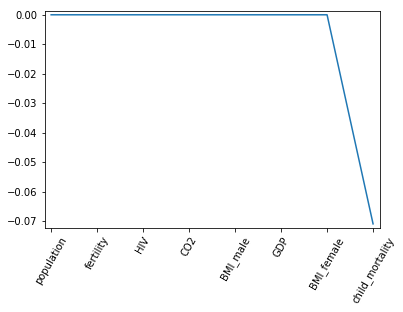

In [34]:
y_col=gapminder.drop(['life','Region'],axis=1)
print(y_col.columns)

plt.plot(range(len(y_col.columns)), lasso_coef)
plt.xticks(range(len(y_col.columns)), y_col.columns, rotation=60)
plt.margins(0.02)
plt.show()

# Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

In [35]:
from sklearn.linear_model import Ridge

### Setup the array of alphas and lists to store scores

In [36]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

### instansiate ridge regressor 

In [37]:
ridge=Ridge(normalize=True)

In [38]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,x,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

### Display plot 

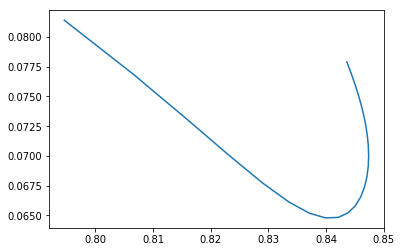

In [39]:
plt.plot(ridge_scores,ridge_scores_std)

In [ ]:
dd